<a href="https://colab.research.google.com/github/manjari-cse/Lung-Cancer-Nodule-detection/blob/main/lung_nodule_image_rendering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install SimpleITK

     |████████████████████████████████| 44.9MB 91kB/s 


Parsing Annotations file

In [ ]:
import pandas as pd
files = pd.read_csv('/content/annotations (1).csv')
files.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [ ]:
files.shape

(1186, 5)

In [ ]:
files['class'].value_counts()

0    549714
1      1351
Name: class, dtype: int64

Get the header information from mhd file

In [ ]:
import SimpleITK as sitk
ds = sitk.ReadImage("/content/1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097.mhd", sitk.sitkFloat32)

In [ ]:
print(ds)

Image (0x3be19c0)
  RTTI typeinfo:   itk::Image<float, 3u>
  Reference Count: 1
  Modified Time: 1369
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1342
  UpdateMTime: 1368
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 246]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 246]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 246]
  Spacing: [0.742188, 0.742188, 1]
  Origin: [-164.493, -75.1802, -557.5]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.742188 0 0
0 0.742188 0
0 0 1

  PointToIndexMatrix: 
1.34737 0 0
0 1.34737 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x4df9e80)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference Co

In [ ]:
origin = ds.GetOrigin()
spacing = ds.GetSpacing()
new_files = files[files['seriesuid']=='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097']

In [ ]:
print(new_files)

                                             seriesuid  ...  diameter_mm
135  1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752...  ...    11.139832
136  1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752...  ...    17.693824

[2 rows x 5 columns]


In [ ]:
t = 136
diameter=new_files['diameter_mm'][t]
x = new_files['coordX'][t]
y = new_files['coordY'][t]
z = new_files['coordZ'][t]
print(x)
print(y)
print(z)

-80.44626828
183.9384127
-467.8757027


In [ ]:
print(new_files['ROW_NUMBER'][135])

NameError: ignored

In [ ]:
import numpy as np
x1 = np.abs(x-origin[0])/spacing[0]
x2 = np.abs(y-origin[1])/spacing[1]
x3 = np.abs(z-origin[2])/spacing[2]

In [ ]:
print(x1)
print(x2)
print(x3)

113.24180711747368
349.1282111326315
89.62429730000002


# **Extracting image from .mhd and .zraw file**

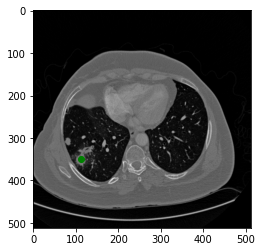

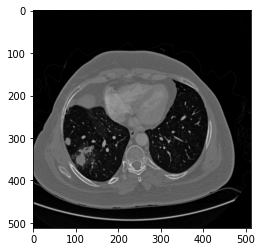

<Figure size 720x360 with 0 Axes>

In [ ]:
import SimpleITK as sitk
import matplotlib.pylab as plt
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage("/content/1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097.mhd", sitk.sitkFloat32))
plt.imshow(ct_scans[90])
plt.plot(x1,x2,'go')
plt.gray()
plt.show()
plt.imshow(ct_scans[90])

plt.gray()
plt.show()

plt.figure(figsize=(10,5))
plt.gray()


    


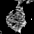

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cropped = ct_scans[90][int(x2)-int(diameter):int(x2)+int(diameter), int(x1)-int(diameter):int(x1)+int(diameter)]
cv2_imshow(cropped)


In [ ]:
import numpy
biggest = numpy.amax(ct_scans[90])
print(biggest)

1423.0


-465.23633


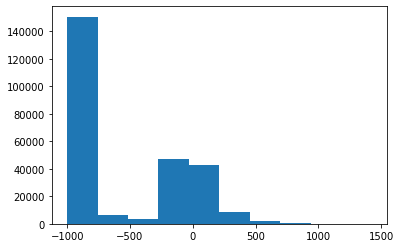

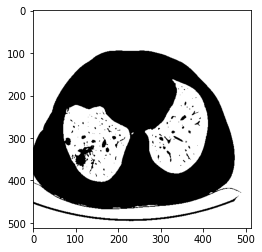

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure
image=ct_scans[90]
val = filters.threshold_otsu(image)
print(val)
hist, bins_center = exposure.histogram(image)
plt.hist(ct_scans[90].ravel())
plt.show()

plt.imshow(image<val)

plt.show()

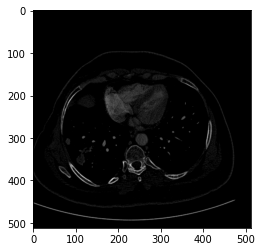

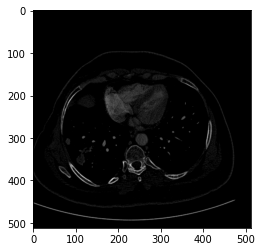

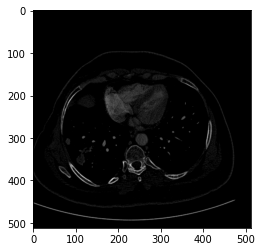

In [ ]:
image1=ct_scans[90]
for i in range(0,512):
  for j in range(0,512):
    if(image1[i][j]<0):
      image1[i][j]=0
plt.imshow(image1)
plt.show()
plt.imshow(ct_scans[90])
plt.show()
